# Preprocessing
## imports

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime,timedelta
connection_post = sqlite3.connect('cruise_post.db')
connection_pre = sqlite3.connect('cruise_pre.db')
df_pre = pd.read_sql_query("SELECT * FROM cruise_pre",connection_pre,index_col="index")
df_post = pd.read_sql_query("SELECT * FROM cruise_post",connection_post,index_col="index")
connection_post.close()
connection_pre.close()

## Basic information and statistics

information such as data size, features to be compared to the assessment questions documents' feature descriptions.
common statistics to see the numerical features' data overall patterns  

In [2]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Gender                                      120290 non-null  object 
 1   Date of Birth                               119062 non-null  object 
 2   Source of Traffic                           133746 non-null  object 
 3   Onboard Wifi Service                        114254 non-null  object 
 4   Embarkation/Disembarkation time convenient  118103 non-null  float64
 5   Ease of Online booking                      115391 non-null  float64
 6   Gate location                               116606 non-null  float64
 7   Logging                                     133746 non-null  object 
 8   Onboard Dining Service                      116937 non-null  object 
 9   Online Check-in                             118059 non-null  float64
 

In [3]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Cruise Name      117815 non-null  object 
 1   Ticket Type      113685 non-null  object 
 2   Cruise Distance  119260 non-null  object 
 3   Ext_Intcode      133746 non-null  object 
 4   WiFi             64012 non-null   float64
 5   Dining           133746 non-null  int64  
 6   Entertainment    73689 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ MB


In [4]:
df_pre.describe()

,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Online Check-in,Cabin Comfort,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness
count,118103.000000,115391.000000,116606.000000,118059.000000,113494.000000,119914.000000,113453.000000,119399.000000,115419.000000,115344.000000
mean,3.055850,2.758170,2.978526,3.249884,3.439574,3.383925,3.633416,3.308470,3.641844,3.285745
std,1.526012,1.401888,1.277984,1.350811,1.321604,1.287508,1.178899,1.266476,1.177988,1.313328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df_post.describe()

,WiFi,Dining,Entertainment
count,64012.000000,133746.000000,73689.000000
mean,0.500578,0.499290,0.503142
std,0.500004,0.500001,0.499994
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [6]:
df_pre.sample(10)

,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode
index,,,,,,,,,,,,,,,,,,
43876,Female,12/01/2001,Direct - Company Website,Somewhat important,5.0,5.0,5.0,21/03/2023 21:10,Somewhat important,3.0,2.0,None,4.0,3.0,1.0,3.0,3.0,LB683GWLYBU
1688,Male,14/12/1966,Direct - Email Marketing,Very important,3.0,3.0,3.0,04/01/2023 1:51,Very important,4.0,NaN,Very important,3.0,NaN,2.0,1.0,NaN,LB988JXJJOQ
59718,Male,13/08/1997,Direct - Email Marketing,Extremely important,5.0,NaN,5.0,19/04/2023 5:13,None,5.0,NaN,Extremely important,2.0,5.0,5.0,4.0,NaN,BL609EFAWNI
116940,None,22/02/1986,Direct - Company Website,A little important,0.0,NaN,3.0,01/08/2023 15:36,Not at all important,0.0,2.0,Not at all important,4.0,3.0,2.0,4.0,1.0,LB667HHPMFT
39144,Male,27/10/1992,Direct - Company Website,Not at all important,3.0,1.0,3.0,13/03/2023 5:59,None,1.0,5.0,Extremely important,2.0,2.0,NaN,2.0,5.0,LB141QFUMQR
46633,Female,03/05/1986,Direct - Company Website,None,1.0,1.0,1.0,26/03/2023 20:22,Extremely important,5.0,5.0,Extremely important,4.0,4.0,1.0,1.0,5.0,BL208XIVKTN
99346,Female,11/10/1978,Direct - Company Website,A little important,2.0,2.0,2.0,30/06/2023 15:35,Somewhat important,3.0,NaN,Very important,4.0,NaN,NaN,4.0,NaN,LB395PURPPK
132677,None,09/04/1979,Direct - Company Website,Somewhat important,4.0,NaN,1.0,30/08/2023 1:21,Very important,5.0,4.0,A little important,2.0,2.0,NaN,2.0,3.0,BL418KIUMZC
15960,None,02/06/1990,Direct - Email Marketing,Very important,4.0,NaN,4.0,29/01/2023 18:48,None,4.0,3.0,Very important,4.0,4.0,2.0,NaN,NaN,LB173MQKEOX


In [7]:
df_post.sample(10)

,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment
index,,,,,,,
49548,IAPRAS,Standard,199 KM,LB703UBGSZB,NaN,0,NaN
105275,blast,Deluxe,522 KM,BL347IVQMZA,NaN,1,1.0
133317,None,None,2227 KM,LB236VQBAGX,0.0,1,1.0
13797,Blastoise,Luxury,None,LB148OQHJYS,1.0,1,1.0
7096,Blastoise,Luxury,760 KM,BL976WRAIGY,0.0,1,0.0
68236,Blastoise,Luxury,3563 KM,LB622WSEMTE,0.0,0,0.0
15536,Blastoise,Luxury,937 KM,LB654DAMFIP,1.0,1,0.0
37081,Blastoise,None,184 KM,LB234GLLPHH,0.0,0,0.0
50746,None,Luxury,3652 KM,BL433PXNGTJ,1.0,0,0.0


### Findings

There are many nans in the data set. Both dfs are of the same size.  
There are some feature engineering opportunities from categorial data to numerical.   
Especially those from importance scale.  

## Visualisation of missing values

Matrix plot to find pattern of missingness in the datasets.  
  
Bar chart to visualise how many missing values in each column of the datasets.  
  
Heat map shows the correlations between every 2 columns.
  
### `df_pre`

<AxesSubplot:>

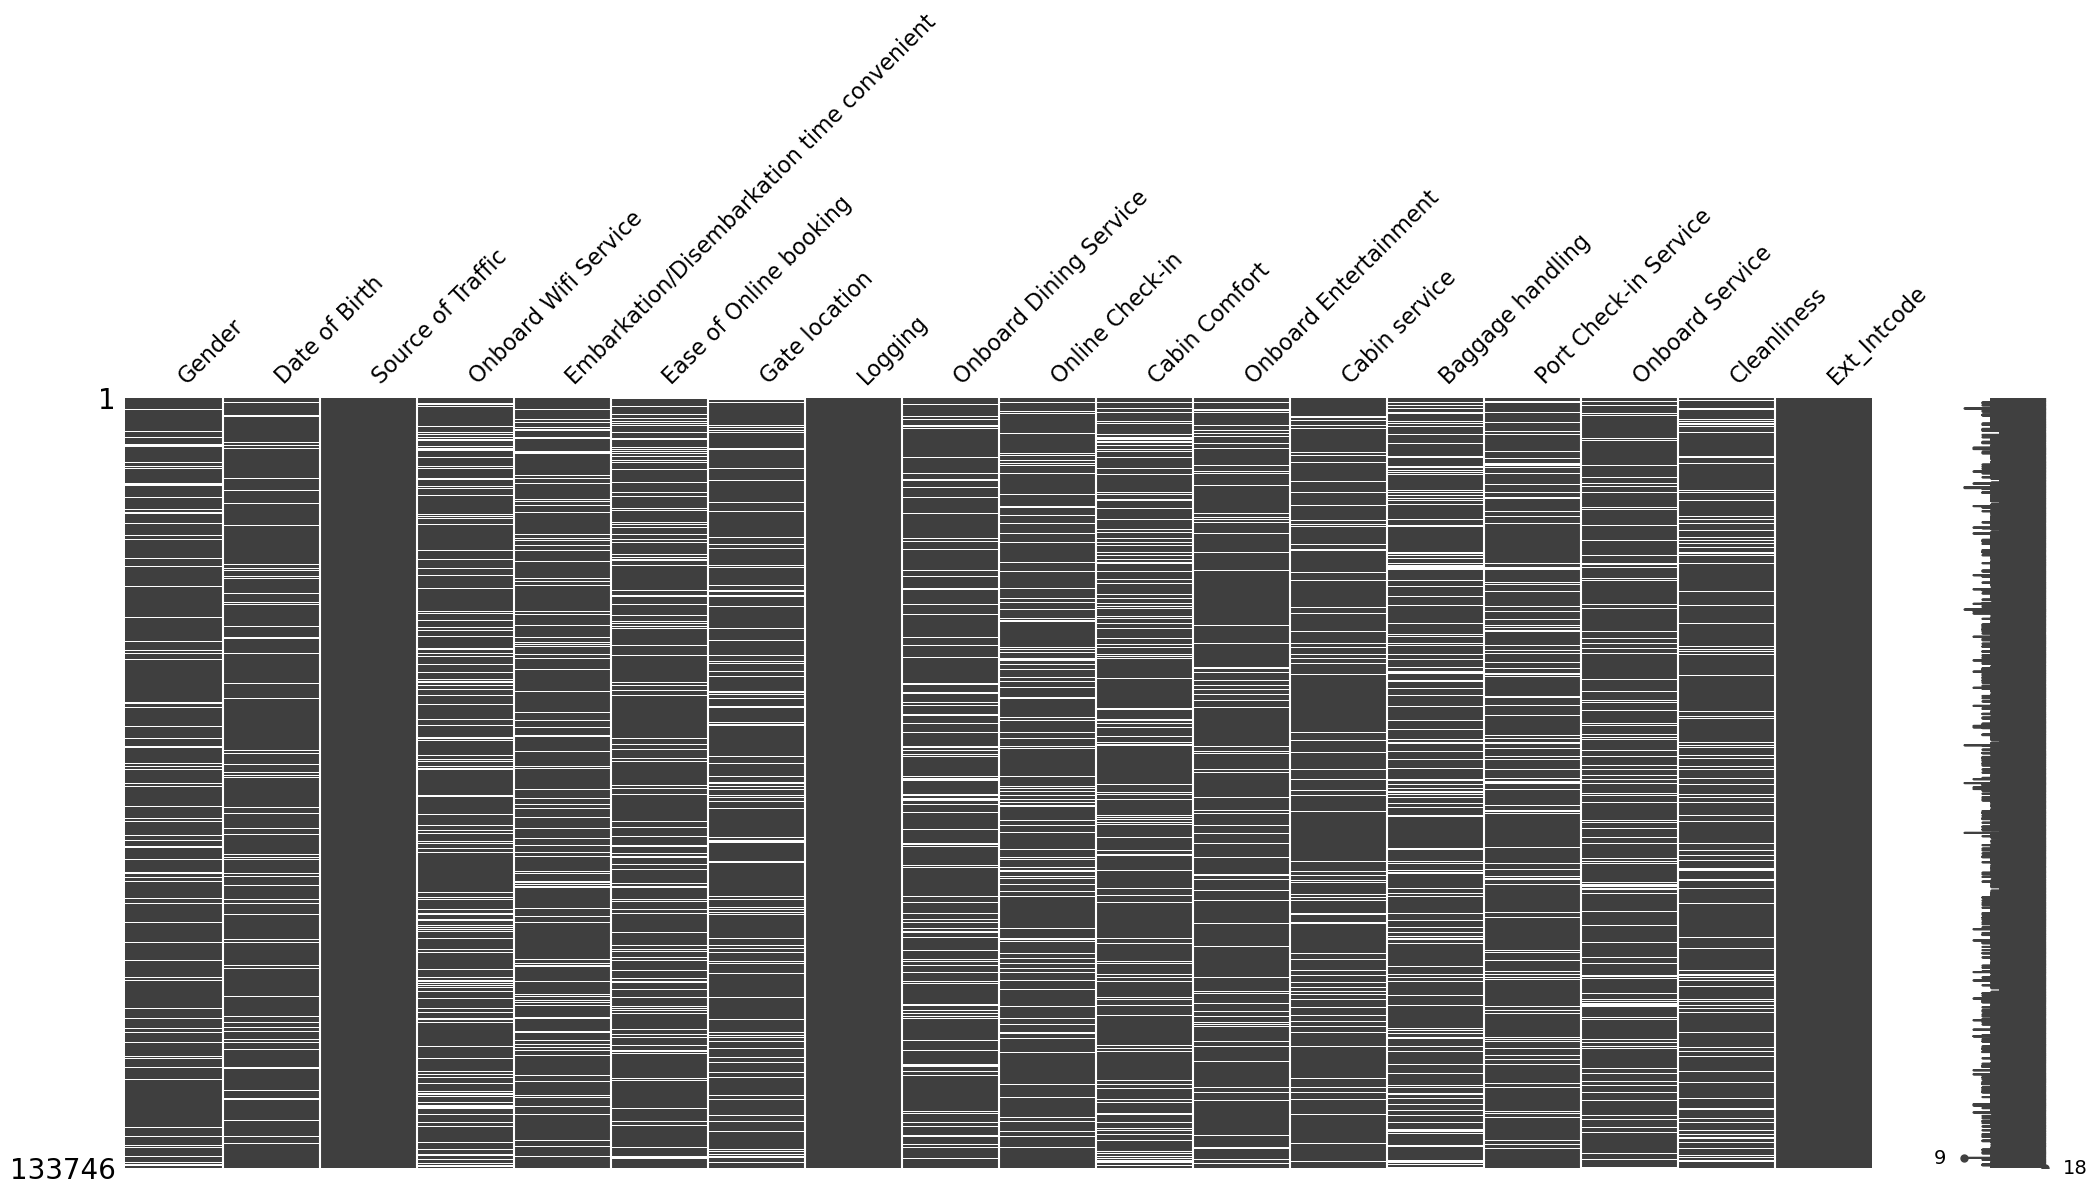

In [8]:
msno.matrix(df_pre)

<AxesSubplot:>

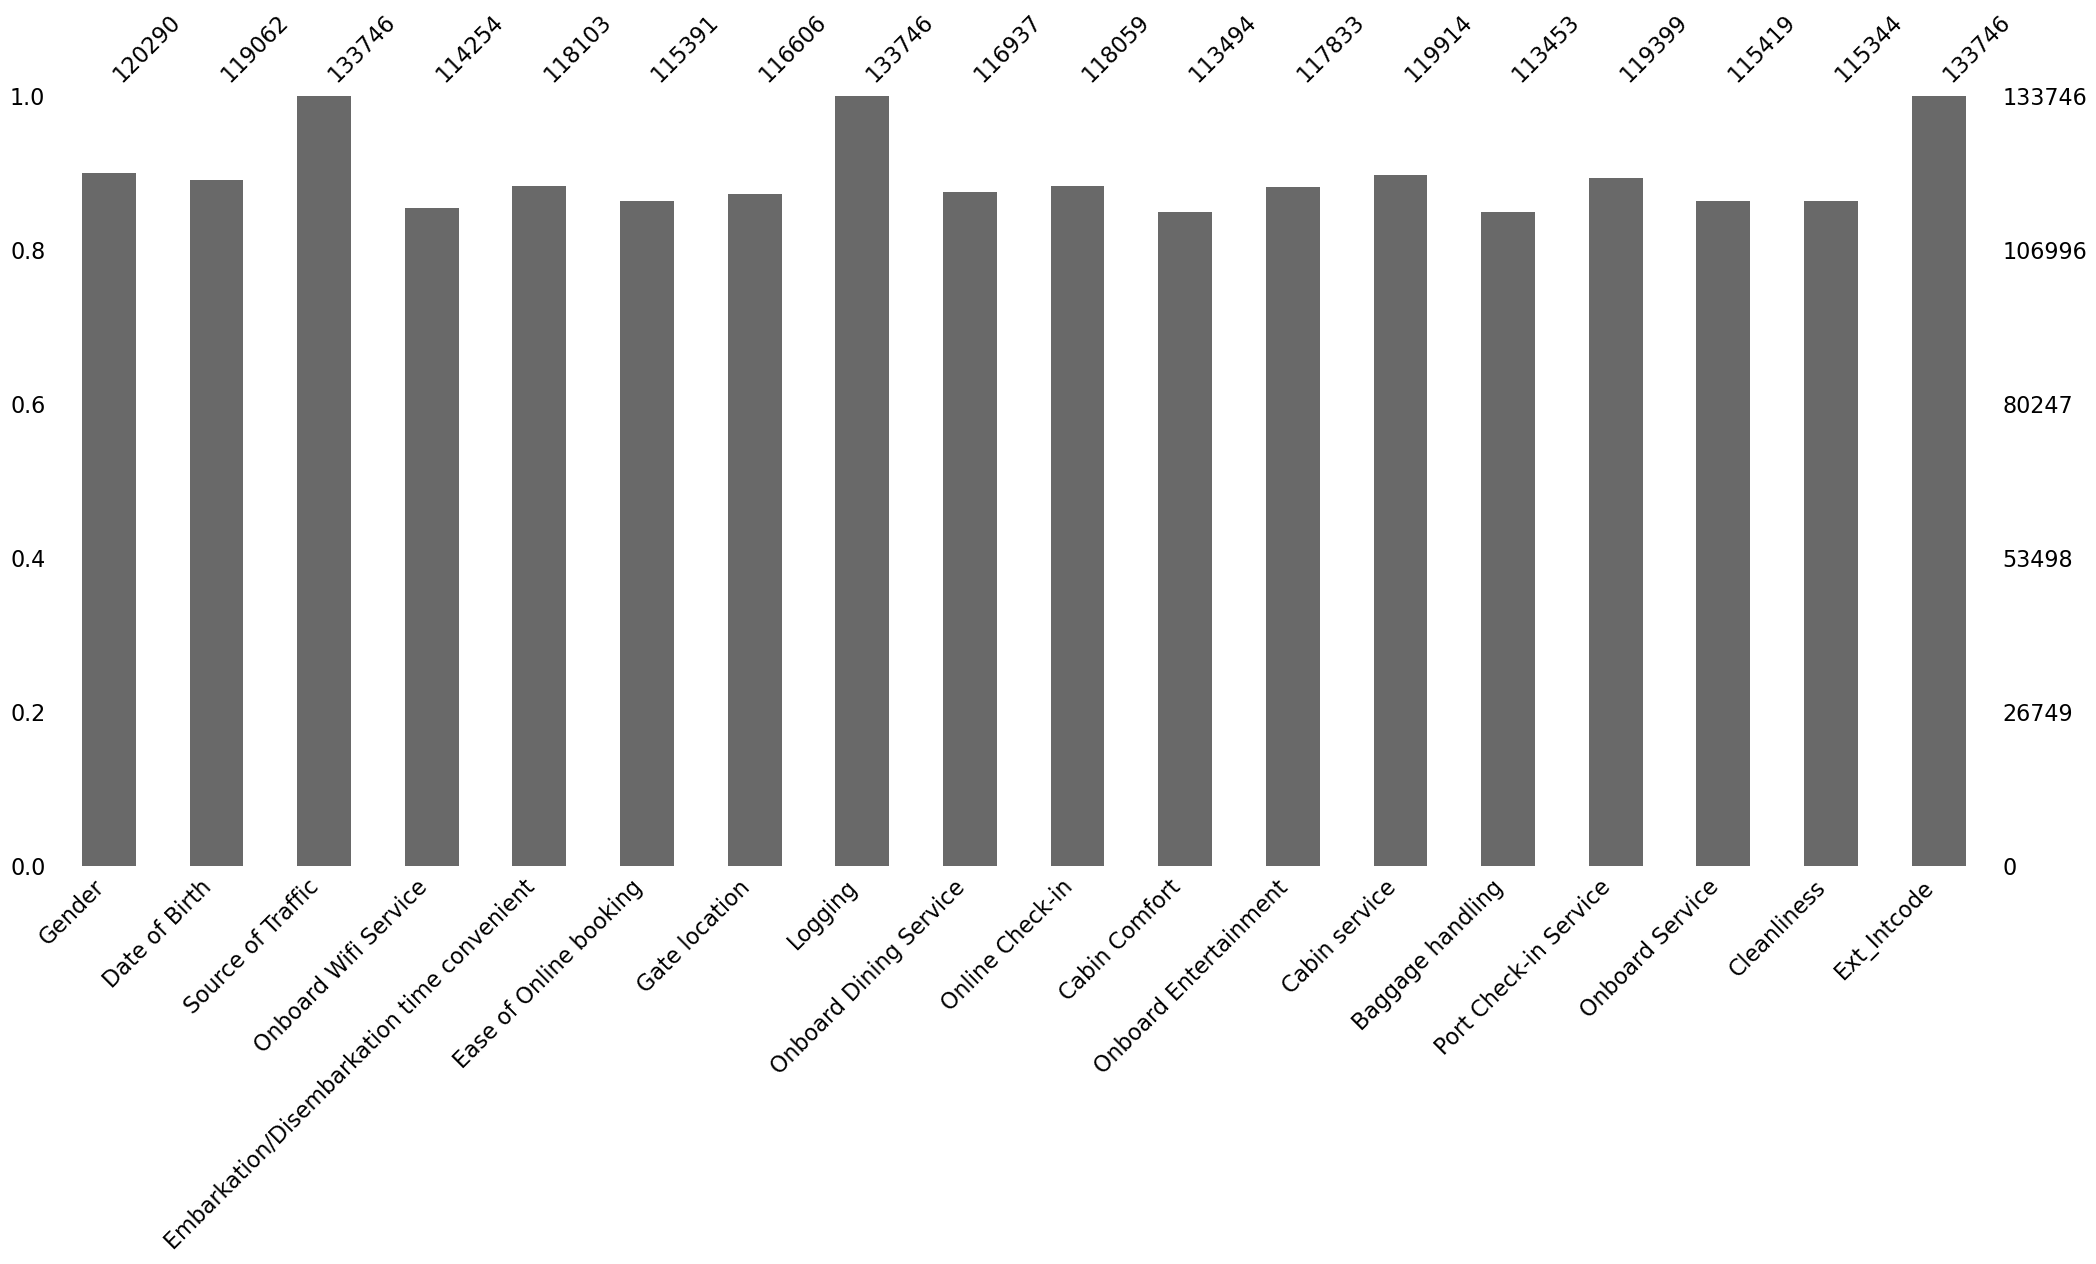

In [9]:
msno.bar(df_pre)

<AxesSubplot:>

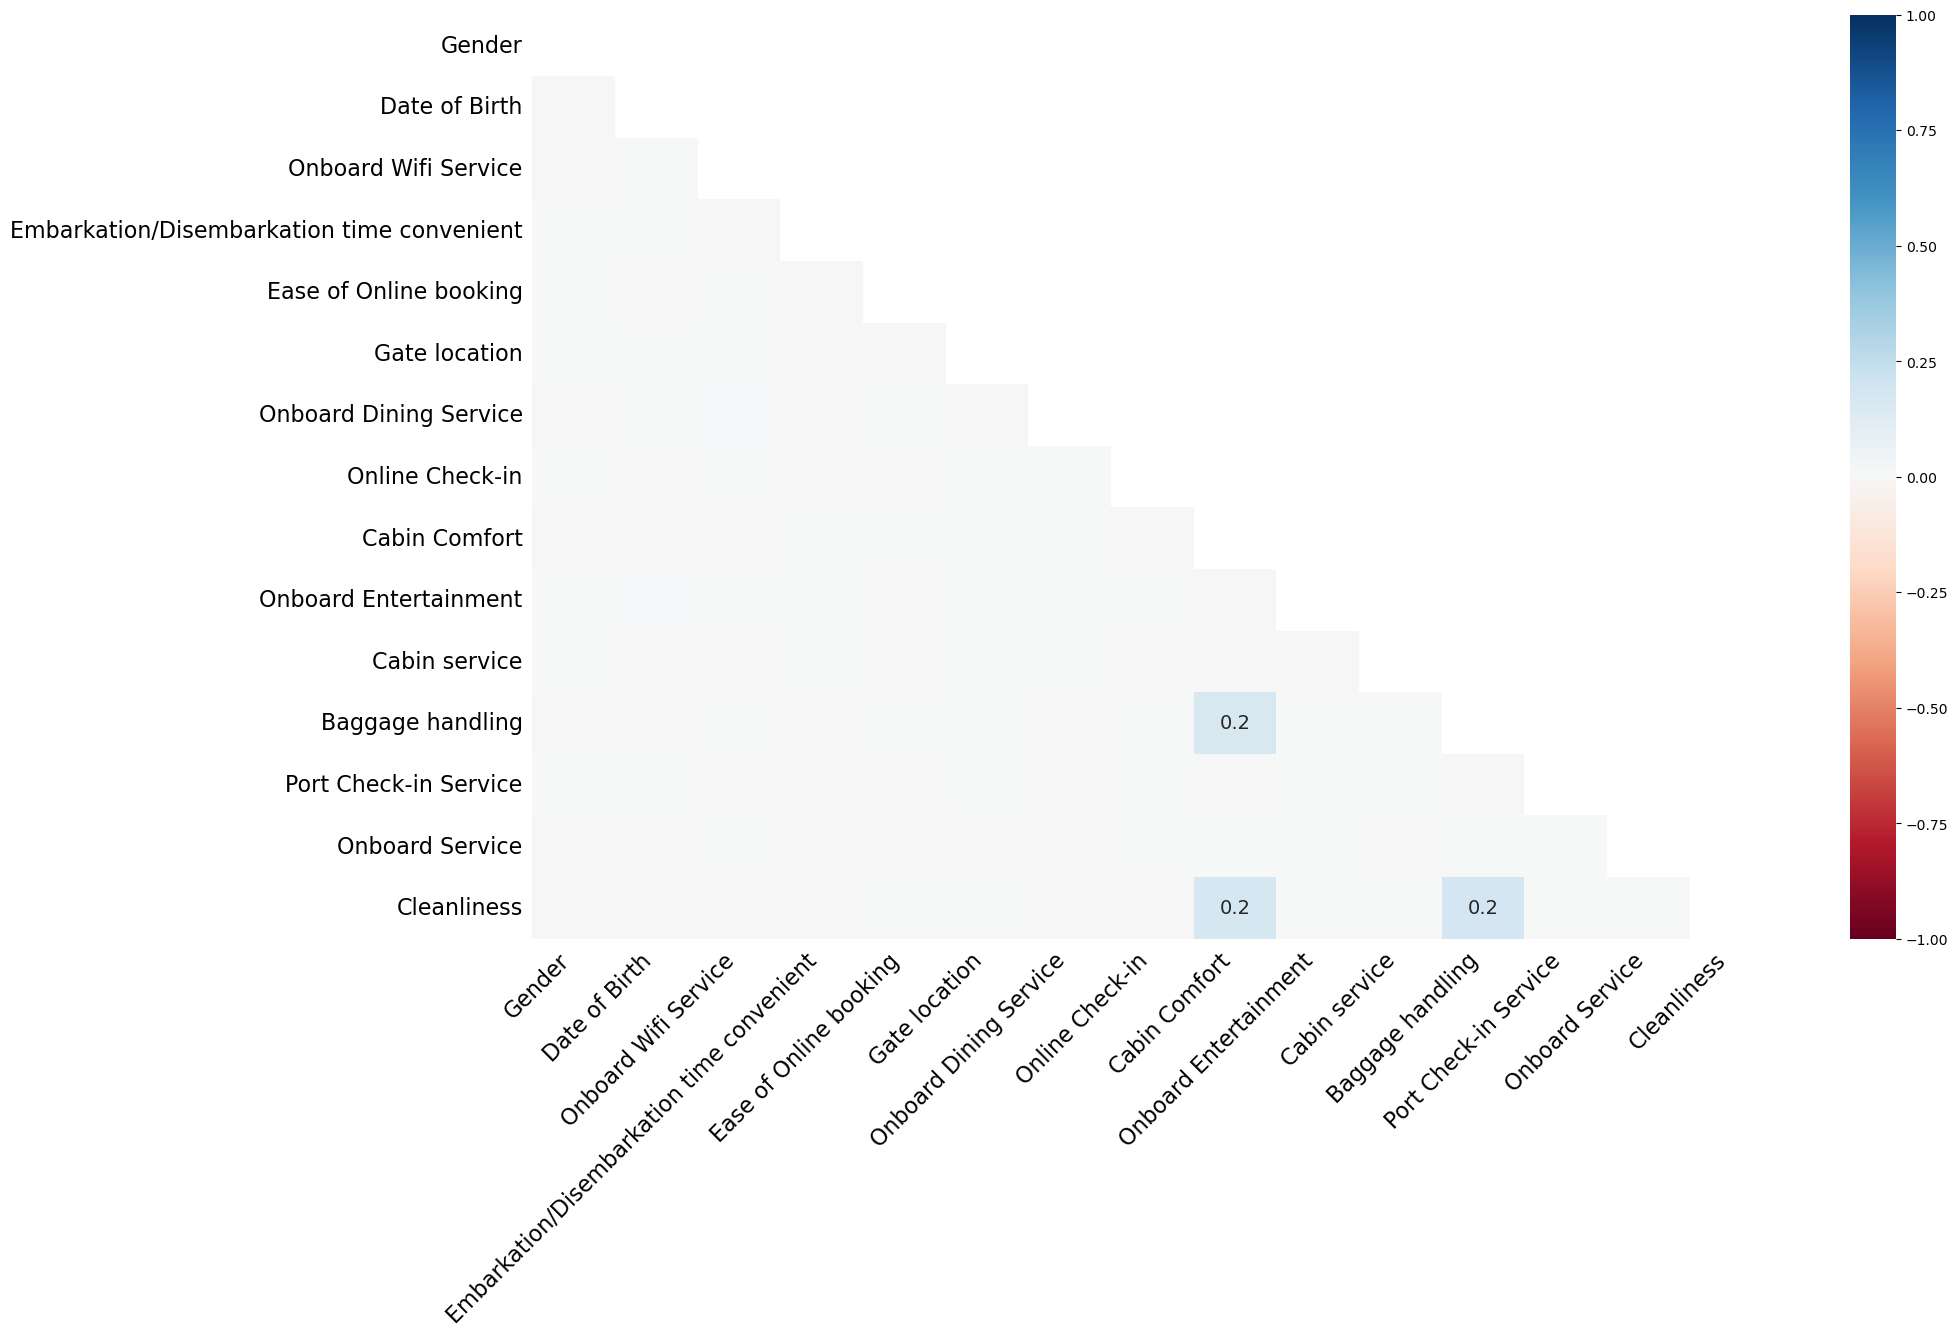

In [10]:
msno.heatmap(df_pre)

### `df_post`

<AxesSubplot:>

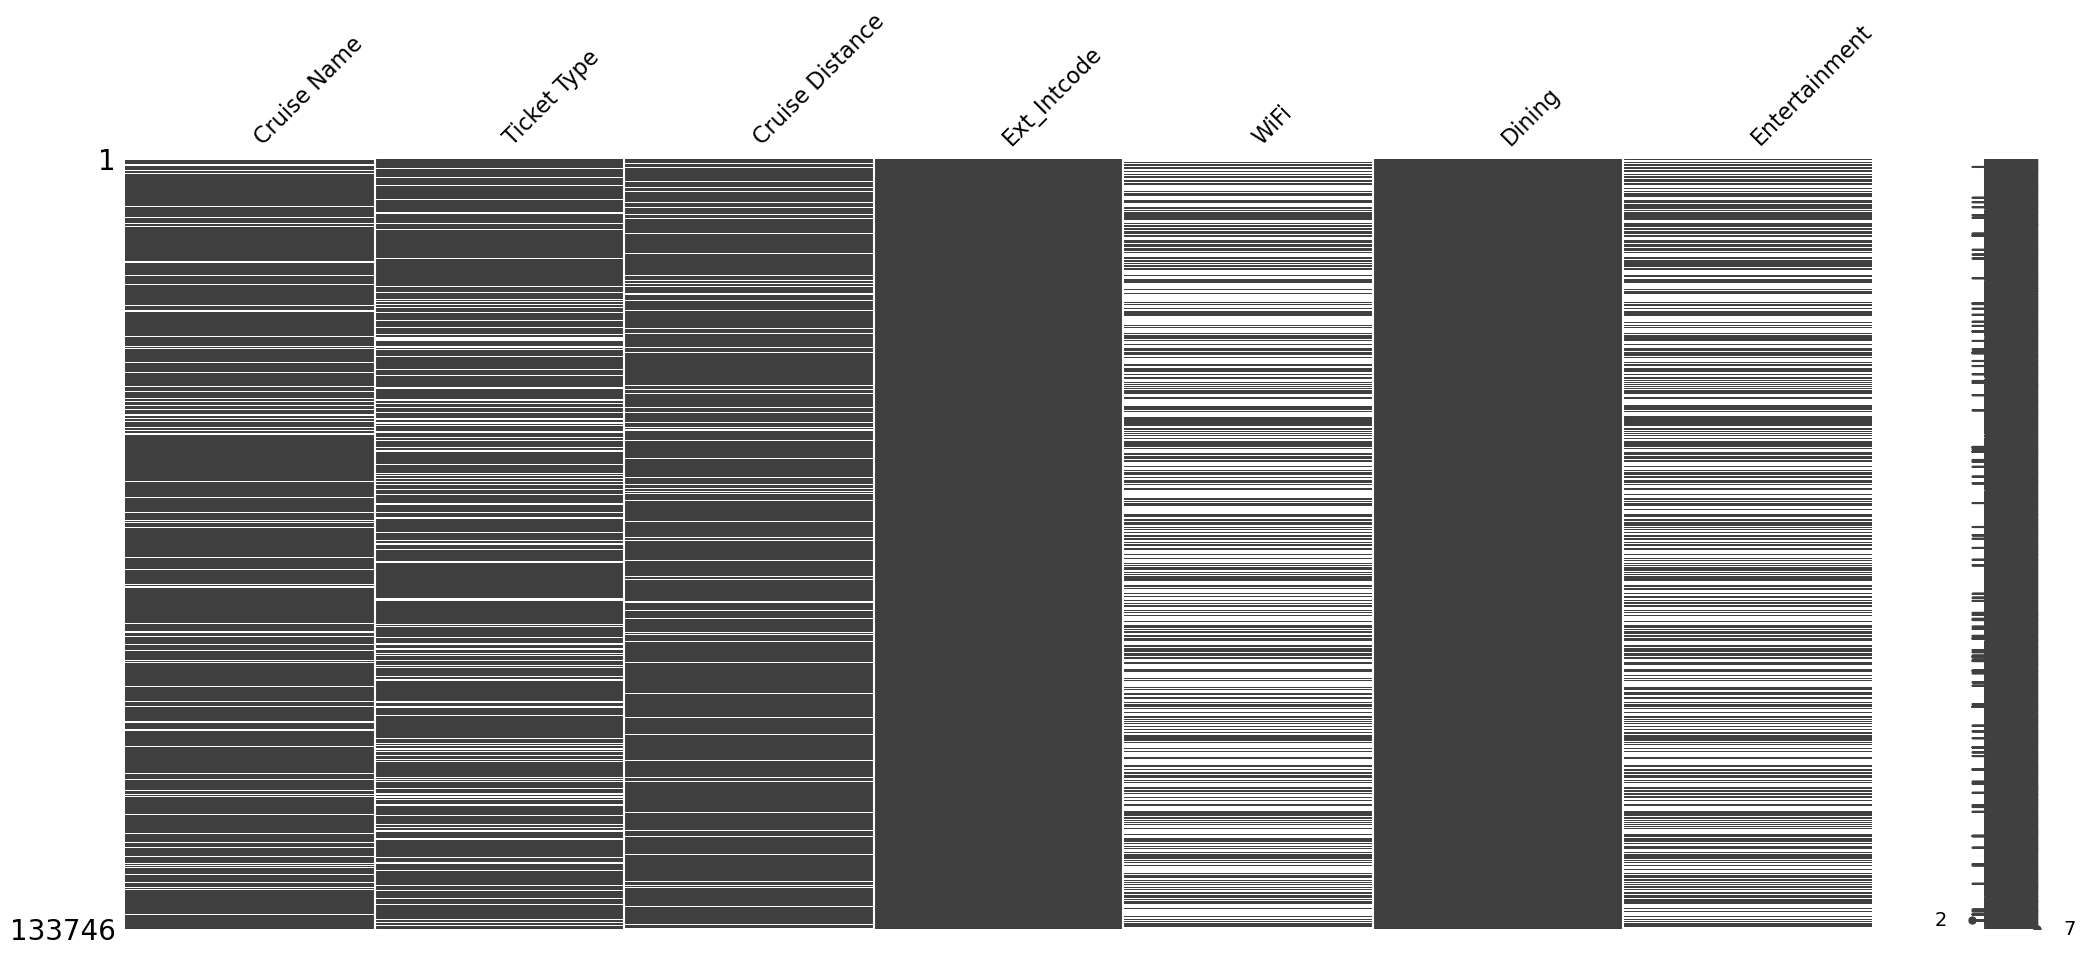

In [11]:
msno.matrix(df_post)

<AxesSubplot:>

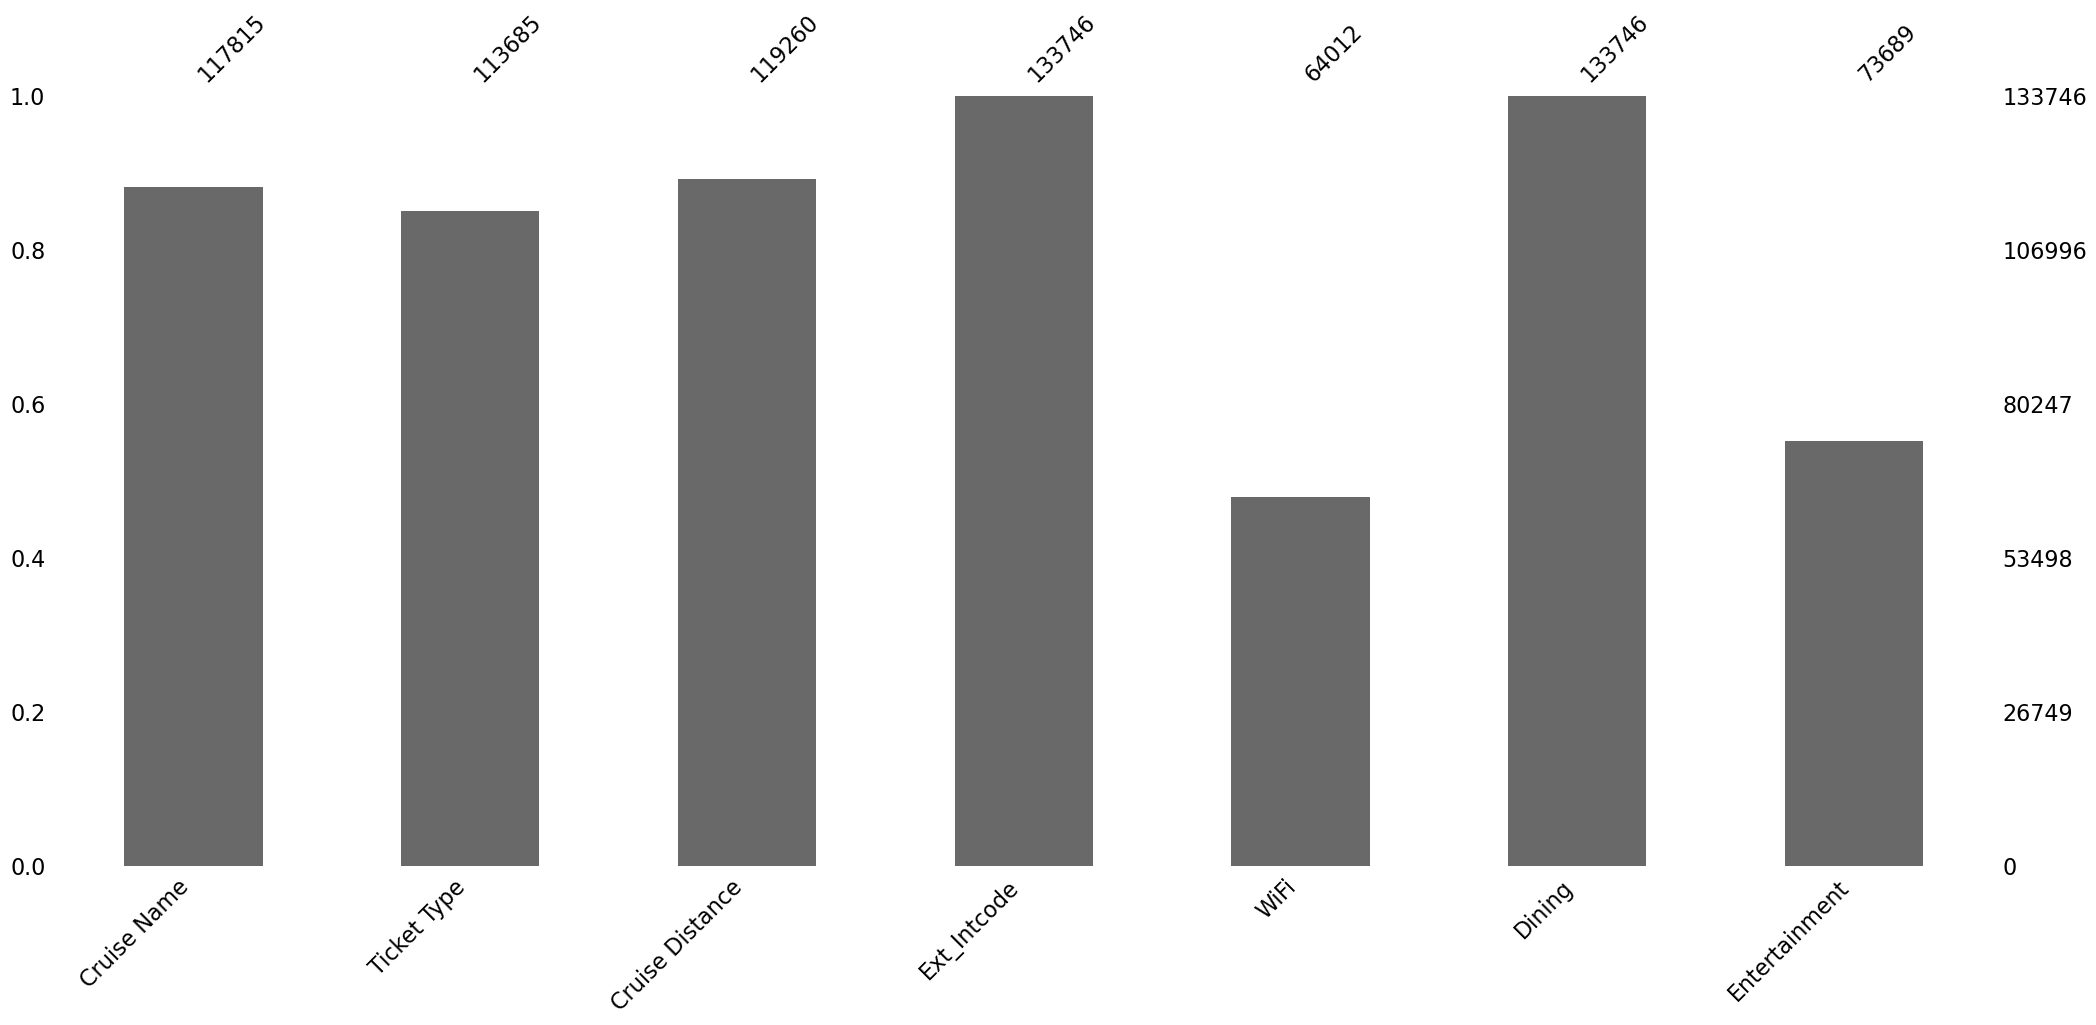

In [12]:
msno.bar(df_post)

<AxesSubplot:>

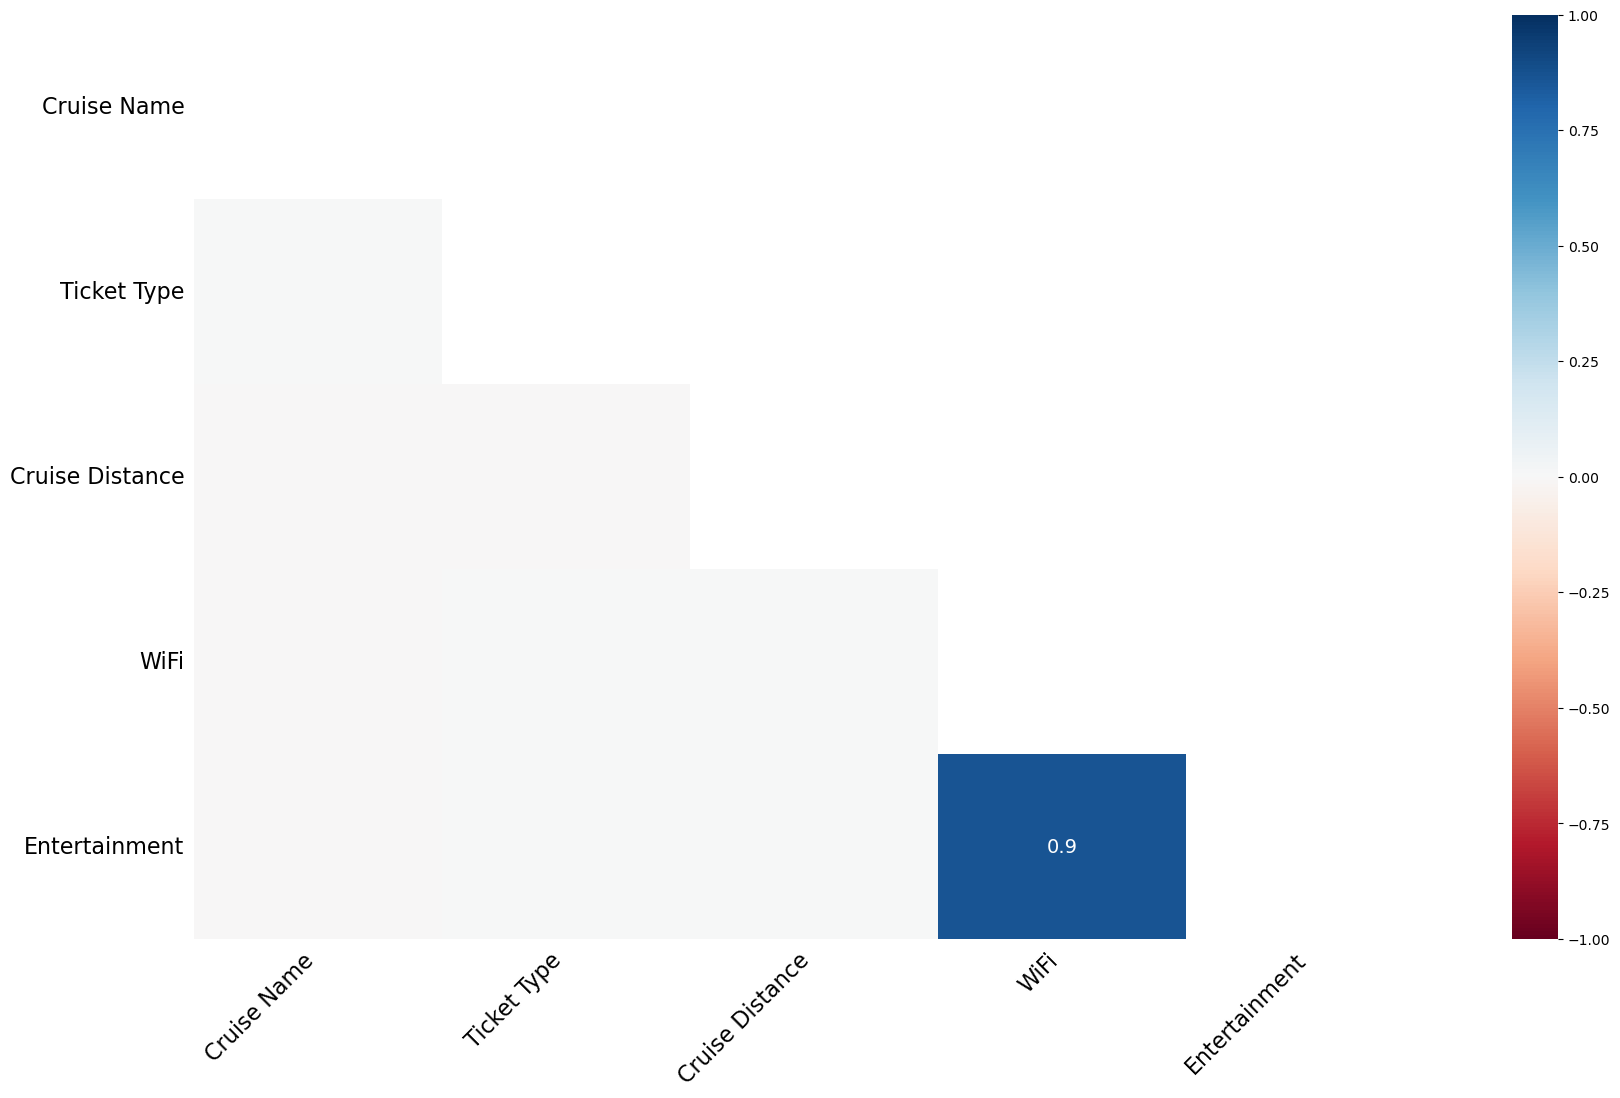

In [13]:
msno.heatmap(df_post)

### Findings

Not much dependence between occurence of missing values in `df_pre`.  
For `df_post`, also not much dependence except for `WiFi` and `Entertainment` with the value of `0.9`in the heatmap.    
The data in `df_pre` and `df_post` seesm to indicate more towards Missing At Random. They are not completely missing at random though as the heat map indicates some correlations  

source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/
 
These nans should require imputation as according to the assessment question document, customers are required to answer these questions without leaving them blank.

## Renaming  
  
For a more consistent feature naming scheme easier to use through dot operator and autocomplete

In [14]:
internal_passanger_code_text = "internal_passanger_code"

In [15]:
df_pre.rename({"Ext_Intcode":internal_passanger_code_text},axis=1,inplace=True)
df_post.rename({"Ext_Intcode":internal_passanger_code_text},axis=1,inplace=True)

def replace_spaces(x):
    return x.replace(" ","_").strip().lower()
  
df_pre.rename(replace_spaces,axis=1,inplace=True)
df_post.rename(replace_spaces,axis=1,inplace=True)

df_pre.columns

Index(['gender', 'date_of_birth', 'source_of_traffic', 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'logging', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness', 'internal_passanger_code'],
      dtype='object')

In [16]:
df_post.columns

Index(['cruise_name', 'ticket_type', 'cruise_distance',
       'internal_passanger_code', 'wifi', 'dining', 'entertainment'],
      dtype='object')

## Are there any rows with repeated passanger code in each dataset?

Since since there is no mentioned of unique passanger code required, It maybe good to keep them if they are from different logging times and remove if they are too similar? 

Does post trip data also have vouchers and upgrades available just like the the pre trip data?

In [17]:
df_pre_2_duplicated = df_pre.groupby(internal_passanger_code_text).size()[lambda x: x>1]
df_pre_2_duplicated.unique()

array([2])

In [18]:
df_post_2_duplicated = df_post.groupby(internal_passanger_code_text).size()[lambda x: x>1]
df_post_2_duplicated.unique()

array([2])

In [19]:
df_pre.duplicated(internal_passanger_code_text).any()

True

In [20]:
df_post.duplicated(internal_passanger_code_text).any()

True

for both cases, the max is two entries per passanger code

In [21]:
(df_pre_2_duplicated.index == df_post_2_duplicated.index).all()

True

curious one to one correspondence

In [22]:
df_pre_2_duplicated = df_pre[lambda x: x.internal_passanger_code.isin(df_pre_2_duplicated.index)]
df_post_2_duplicated = df_post[lambda x: x.internal_passanger_code.isin(df_post_2_duplicated.index)]
temp = df_post_2_duplicated.drop([internal_passanger_code_text],axis=1)
df_2_duplicated = pd.concat([df_pre_2_duplicated,temp],axis=1)
df_split_1 = df_2_duplicated.drop_duplicates(internal_passanger_code_text,keep='first',ignore_index=True)
df_split_2 = df_2_duplicated.drop_duplicates(internal_passanger_code_text,keep='last',ignore_index=True)

comparision =df_split_1.compare(df_split_2)
comparision.head(10)

logging                  cabin_comfort       baggage_handling  \
              self            other          self other             self   
0  01/01/2023 0:06  01/01/2023 0:11           NaN   1.0              NaN   
1  01/01/2023 0:21  01/01/2023 0:26           NaN   5.0              NaN   
2  01/01/2023 1:05  01/01/2023 1:10           NaN   NaN              NaN   
3  01/01/2023 1:14  01/01/2023 1:19           NaN   4.0              NaN   
4  01/01/2023 1:32  01/01/2023 1:37           NaN   1.0              NaN   
5  01/01/2023 1:43  01/01/2023 1:48           NaN   5.0              NaN   
6  01/01/2023 3:43  01/01/2023 3:48           NaN   3.0              NaN   
7  01/01/2023 6:28  01/01/2023 6:33           NaN   4.0              NaN   
8  01/01/2023 7:42  01/01/2023 7:47           NaN   5.0              NaN   
9  01/01/2023 7:44  01/01/2023 7:49           NaN   4.0              NaN   

        cleanliness       ticket_type          
  other        self other        self   other  
0   3.0         NaN   1.0         NaN     NaN  
1   4.0         NaN   5.0         NaN     NaN  
2   4.0         NaN   5.0         NaN     NaN  
3   4.0         NaN   4.0         NaN     NaN  
4   2.0         NaN   1.0    Standard    None  
5   1.0         NaN   5.0         NaN     NaN  
6   NaN         NaN   5.0         NaN     NaN  
7   NaN         NaN   4.0         NaN     NaN  
8   3.0         NaN   5.0         NaN     NaN  
9   4.0         NaN   4.0        None  Luxury

In [23]:
df_split_1.compare(df_split_2).count()

logging           self     3896
                  other    3896
cabin_comfort     self        0
                  other    3423
baggage_handling  self        0
                  other    3416
cleanliness       self        0
                  other    3480
ticket_type       self      479
                  other     546
dtype: int64

In [24]:
comparision.ticket_type = comparision.ticket_type.fillna("")

In [25]:
df_split_2.loc[:,"ticket_type"] = comparision.ticket_type.self + comparision.ticket_type.other
df_split_2.ticket_type.unique()

/tmp/ipykernel_272187/150239904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split_2.loc[:,"ticket_type"] = comparision.ticket_type.self + comparision.ticket_type.other


array(['', 'Standard', 'Luxury', 'Deluxe'], dtype=object)

Selecting df_split_2

I am combining df_post and df_pre data that has no repeated `internal_passanger_code`, the concatenation failed before as `internal_passsanger_code` was repeat in `df_single_code`

In [26]:
post_single_code= df_post[lambda x: ~x.internal_passanger_code.isin(df_split_2.internal_passanger_code)].drop(internal_passanger_code_text,axis=True)
pre_single_code= df_pre[lambda x: ~x.internal_passanger_code.isin(df_split_2.internal_passanger_code)]
print((pre_single_code.index == post_single_code.index).all())
df_single_code = pd.concat([pre_single_code,post_single_code],axis=1)  

df = pd.concat([df_split_2,df_single_code],ignore_index=True)

True


Some have about 30 days difference

### Findings

There are repeated `internal_passanger_code`, After spliting the duplicates up into different dataframes and comparing them, I am selecting `df_split_2` on the most part.
With the exception of `ticket_type` as some have categories and some don't, using the help of compare(). I combined the both dataframe's `ticket_type` into one.


## Splitting into features and target

`ticket_type` is the target and some `tick_type` data with  `nan`s are dropped because it is not possible to impute such data.

In [27]:
df.ticket_type.isna().any()

True

In [28]:
df = df[~df.ticket_type.isna()]
df.ticket_type.isna().any()

False

In [29]:
# temp = df_post.drop([internal_passanger_code_text]
# df = pd.concat([df_pre,temp],axis=1,)
df_x = df.drop(["ticket_type"],axis =1)
df_x.set_index(internal_passanger_code_text,drop=True,inplace=True)

df_y = df.ticket_type

In [30]:
df_x.head()

,gender,date_of_birth,source_of_traffic,onboard_wifi_service,embarkation/disembarkation_time_convenient,ease_of_online_booking,gate_location,logging,onboard_dining_service,online_check-in,...,cabin_service,baggage_handling,port_check-in_service,onboard_service,cleanliness,cruise_name,cruise_distance,wifi,dining,entertainment
internal_passanger_code,,,,,,,,,,,,,,,,,,,,,
LB218CFLOBS,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:11,Not at all important,2.0,...,3.0,3.0,5.0,2.0,1.0,Lapras,1145 Miles,NaN,1,NaN
LB810DDUDEB,Female,08/05/2000,Direct - Company Website,None,5.0,1.0,5.0,01/01/2023 0:26,Extremely important,1.0,...,5.0,4.0,5.0,5.0,5.0,blast,236 Miles,NaN,0,NaN
LB409GVSFKP,None,12/03/1987,Direct - Company Website,Somewhat important,3.0,3.0,3.0,01/01/2023 1:10,Very important,4.0,...,4.0,4.0,3.0,4.0,5.0,Blastoise,2450 KM,1.0,1,1.0
BL870JKZNZY,Female,23/09/2009,Direct - Email Marketing,A little important,1.0,2.0,3.0,01/01/2023 1:19,Very important,2.0,...,3.0,4.0,3.0,3.0,4.0,blastoise,1085 KM,NaN,0,NaN
LB325CKADFV,Male,15/11/1987,Indirect - Social Media,Not at all important,1.0,1.0,2.0,01/01/2023 1:37,Not at all important,1.0,...,5.0,2.0,5.0,NaN,1.0,Blastoise,956 KM,NaN,1,NaN


In [31]:
df_x.columns

Index(['gender', 'date_of_birth', 'source_of_traffic', 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'logging', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness', 'cruise_name', 'cruise_distance', 'wifi', 'dining',
       'entertainment'],
      dtype='object')

# Nan imputation

[According to `scikit-learn`](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation), they state that multiple imputation is an open problem on how useful it is compared  to simple imputation.`InterativeImputer` is still at the experimental stage and have know technical issues.

Unlike `SimpleImputer` which imputes with just a single value, `KNNIMputer` is more sophisticated as it impute based on surrounding data of a feature. However `KNNImputer` is very slow on my machine so `SimpleImputer` is used instead.

A/B testing may still be needed in the ML pipeline to see which option is more optimal.

In [32]:
simple_imputer = SimpleImputer(strategy='median')
ordinal_encoder = OrdinalEncoder()

df_x = ordinal_encoder.fit_transform(df_x)
df_x = simple_imputer.fit_transform(df_x)



# Feature Selection

In order to understand what features are more important, I have used `SelectPercentile` to narrow down all features

In [33]:
select_percentile = SelectPercentile(percentile=50)
df_x = select_percentile.fit_transform(df_x,df_y)

cols = df.columns[select_percentile.get_support(True)]
df_x = pd.DataFrame(df_x,columns=cols)

df_x.head()

,source_of_traffic,online_check-in,cabin_comfort,cabin_service,baggage_handling,port_check-in_service,onboard_service,cleanliness,internal_passanger_code,ticket_type,wifi
0,0.0,2.0,1.0,3.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0
1,0.0,1.0,5.0,5.0,3.0,4.0,5.0,5.0,3.0,1.0,1.0
2,0.0,4.0,4.0,4.0,3.0,2.0,4.0,5.0,0.0,1.0,1.0
3,1.0,2.0,4.0,3.0,3.0,2.0,3.0,4.0,5.0,1.0,1.0
4,3.0,1.0,1.0,5.0,1.0,4.0,4.0,1.0,0.0,1.0,1.0


# seaborn pairplot and heatmap  
  
`pairplot` and `heatmap` used to find correlateions between features.

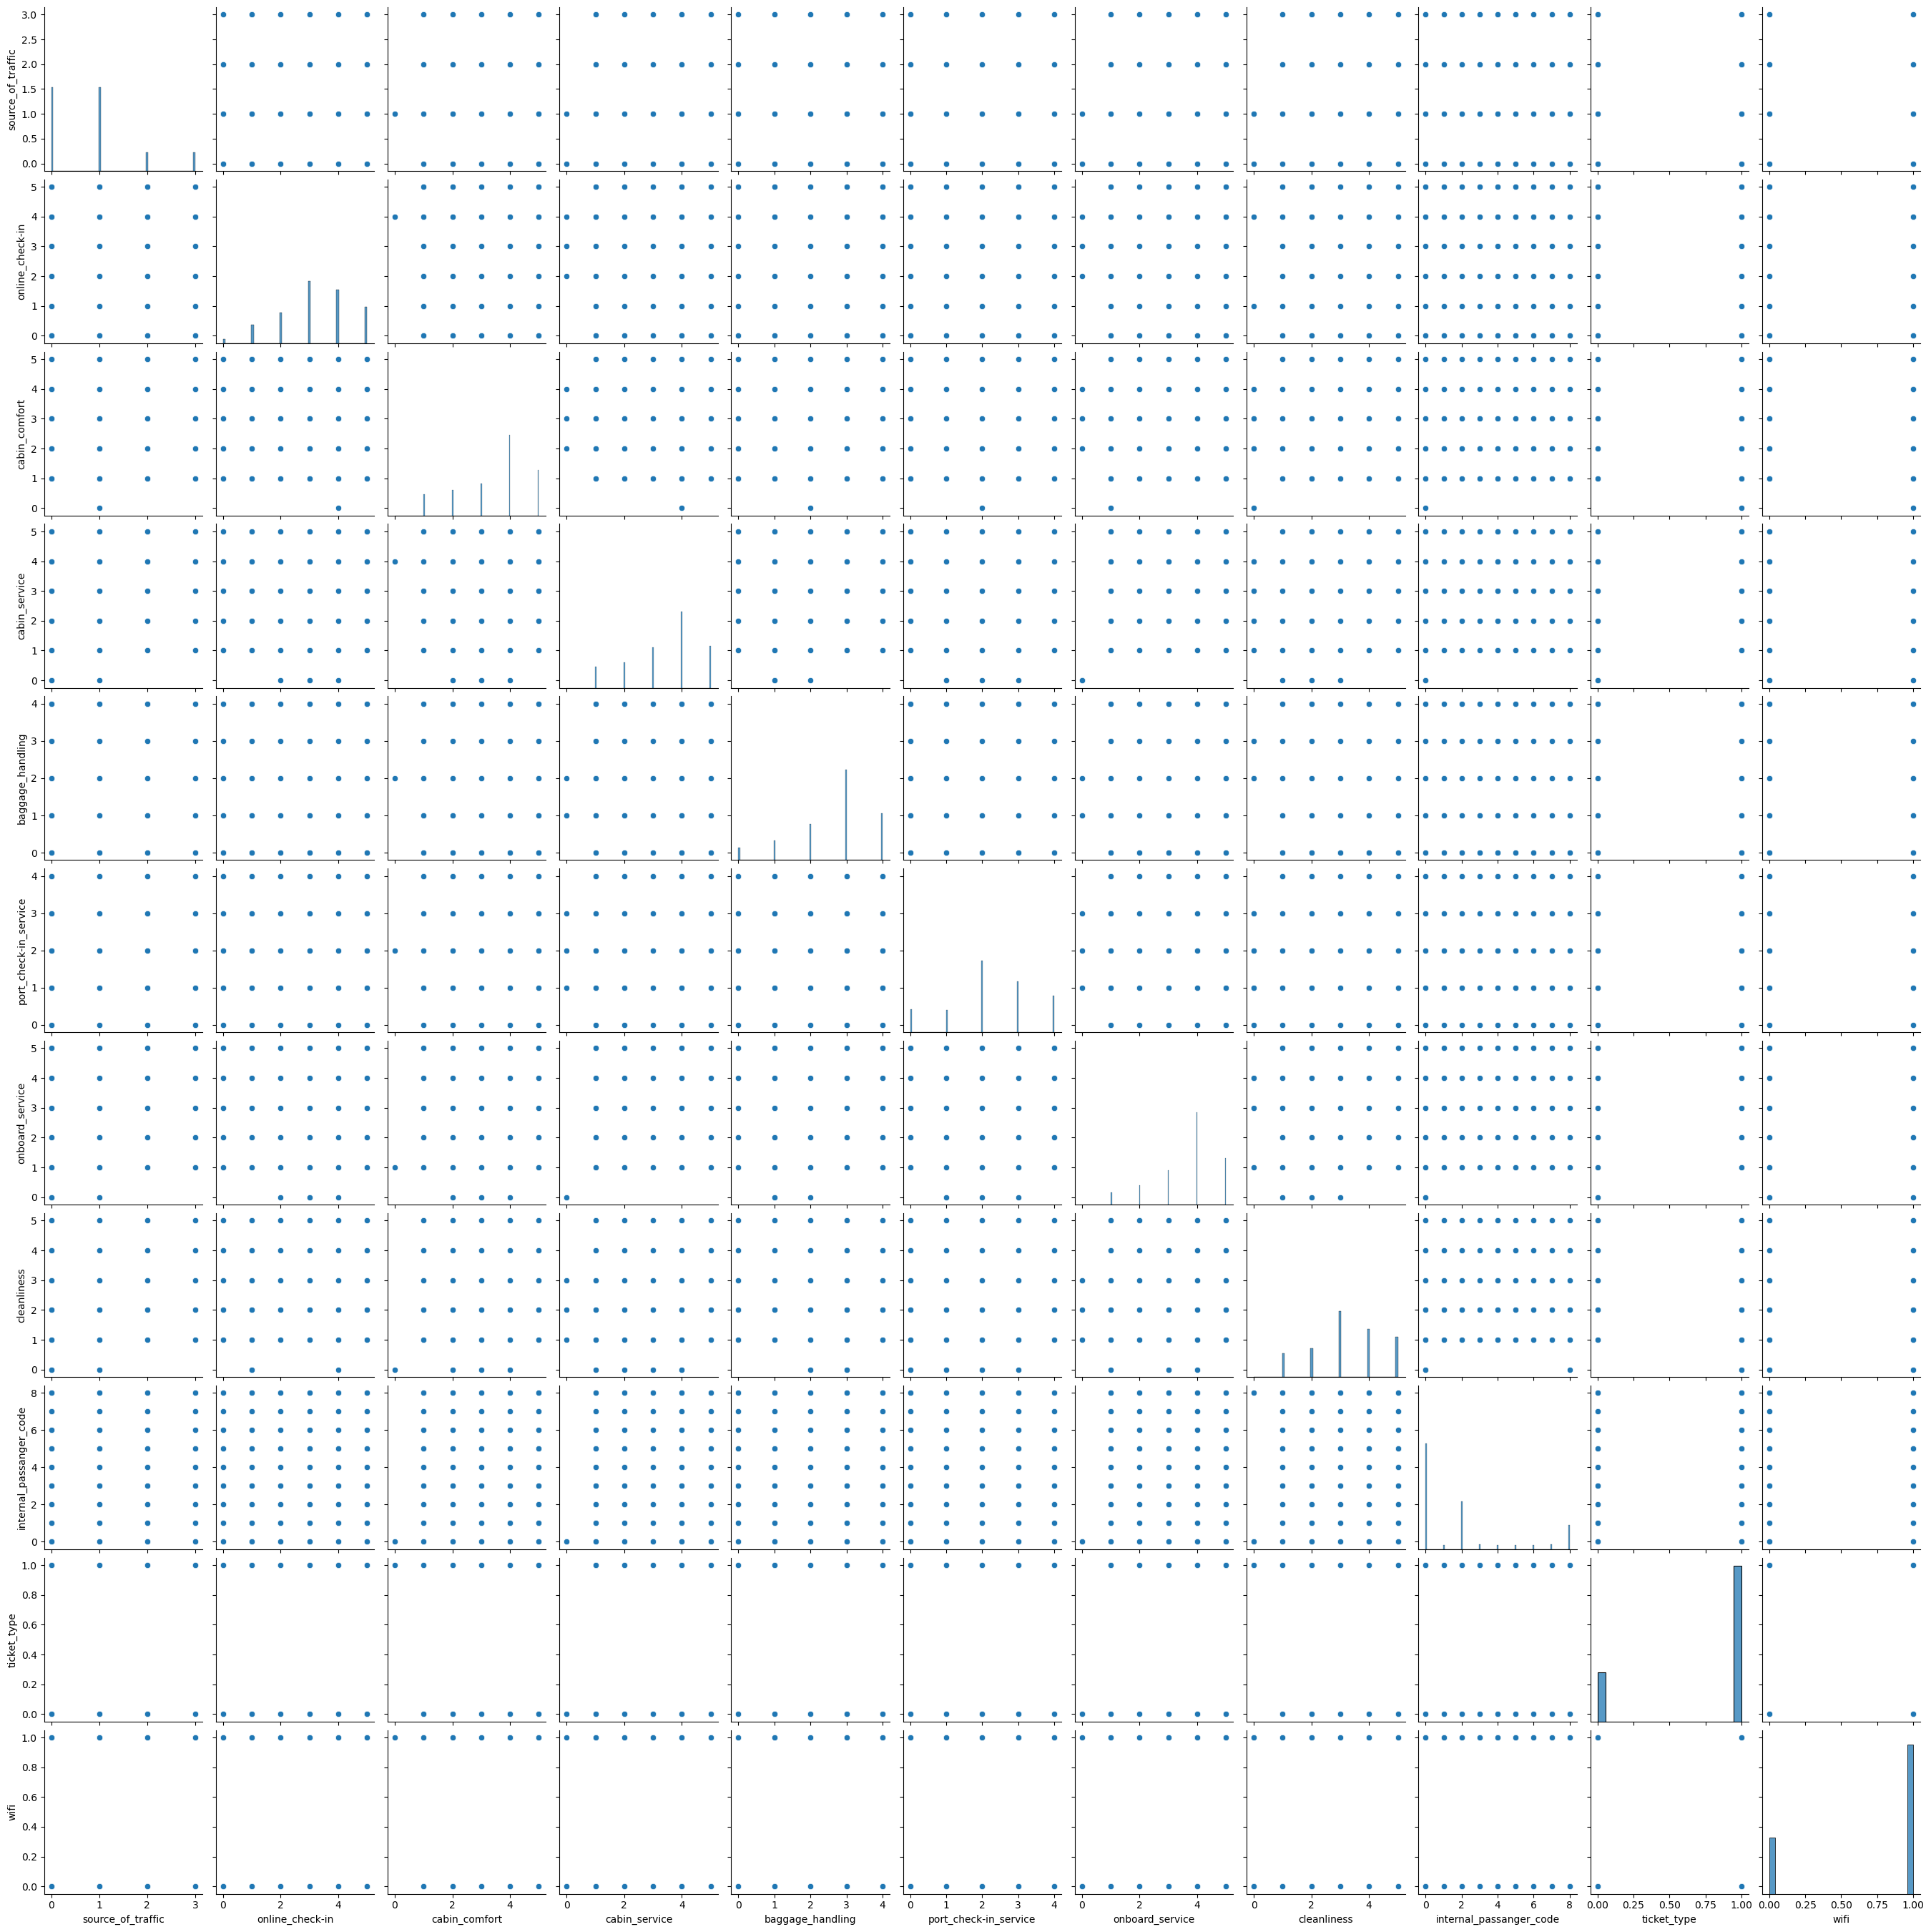

In [34]:
sns.pairplot(df_x)

<AxesSubplot:>

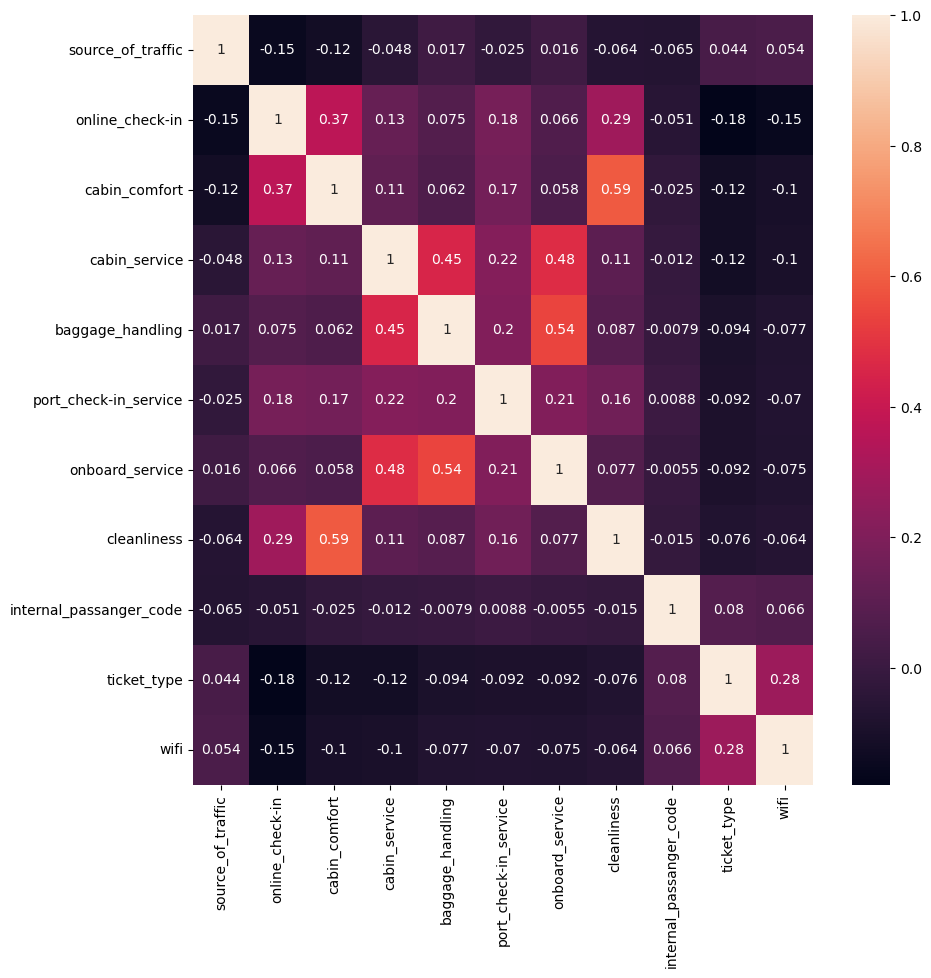

In [35]:
plt.figure(figsize=[10,10])
sns.heatmap(df_x.corr(),annot=True)

### findings
`pairplot` has no visually discernable correlations to pick up
`heatmap` has more correlation information:  
  
<b>Choosing correlations that are more than 0.28:<b>  
    
cabin_confort, online_check-in  .37  
cleanliness, online_check-in  .29  
cleanliness, cabin_comfort  .59  
cabin_service, baggage_handling .45    
cabin_service, onboard_service  .49  
baggage_hangling, onboard_service  .54  
  
  
<b>feature that is more correlated to target:<b>  
    
Wifi, ticket_type   
      
the correlations are not too strong to the poiont where dropping features is necessary.